## PyTorchVision을 참고하여
## Pre-Trained AlexNet/VGG/ResNet/DenseNet 성능 비교하기

In [ ]:
import torchvision.models as models

alexnet = models.alexnet(pretrained=True)
vgg16 = models.vgg16(pretrained=True)
resnet18 = models.resnet18(pretrained=True)
densenet = models.densenet161(pretrained=True)

In [ ]:
import torch
from torchvision import datasets
from torchvision import transforms as T

transform = T.Compose([
    T.Resize(256),
    T.CenterCrop(224),
    T.ToTensor(),
])

trainset = datasets.CIFAR10(root='./data', train=True,
                                       download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                         shuffle=False, num_workers=2)

testset = datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


## Model을 CIFAR10에 맞추어 변경

In [ ]:
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
import torch.nn as nn

in_features = alexnet.classifier[6].in_features
alexnet.classifier[6] = nn.Linear(in_features, len(classes))
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
in_features = vgg16.classifier[6].in_features
vgg16.classifier[6] = nn.Linear(in_features, len(classes))
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
resnet18

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
in_features = resnet18.fc.in_features
resnet18.fc = nn.Linear(in_features, len(classes))
resnet18

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
densenet

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [ ]:
in_features = densenet.classifier.in_features
densenet.classifier = nn.Linear(in_features, len(classes))
densenet

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

## Model을 CIFIAR10으로 트레이닝

In [ ]:
import time

In [ ]:
models = [alexnet, vgg16, resnet18, densenet]
model_names = ["alexnet", "vgg16", "resnet18", "densenet"]
## CUDA 사용가능 할 경우 CUDA 사용
USE_CUDA = True
if USE_CUDA:
    if torch.cuda.is_available():
        device = "cuda:0"
    else:
        device = 'cpu'
        USE_CUDA = False
    print(f"Using {device} for Training")

Using cuda:0 for Training


In [ ]:
import torch.optim as optim

for model, name in zip(models, model_names):
    if USE_CUDA:
        model.to(device)
    # 시간측정
    print(f"{name}: Training Start")
    start = time.time()
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
    for epoch in range(3):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            if USE_CUDA:
                inputs = inputs.to(device)
                labels = labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if i % 1000 == 999:
                print(f"{epoch+1} {i+1:5d} loss: {running_loss / 1000:.3f},\
                       elapsed_time : {time.time() - start:.4f}s")
                start = time.time()
                running_loss = 0.0
    print(f"{name} : Training finished")

alexnet: Training Start
1  1000 loss: 2.111,                       elapsed_time : 20.8677s
1  2000 loss: 1.590,                       elapsed_time : 20.8051s
1  3000 loss: 1.340,                       elapsed_time : 20.7436s
1  4000 loss: 1.217,                       elapsed_time : 20.7512s
1  5000 loss: 1.079,                       elapsed_time : 20.7414s
1  6000 loss: 1.009,                       elapsed_time : 20.6690s
1  7000 loss: 0.930,                       elapsed_time : 20.6503s
1  8000 loss: 0.905,                       elapsed_time : 20.7355s
1  9000 loss: 0.897,                       elapsed_time : 20.6934s
1 10000 loss: 0.872,                       elapsed_time : 20.7170s
1 11000 loss: 0.843,                       elapsed_time : 20.7079s
1 12000 loss: 0.795,                       elapsed_time : 20.7785s
2  1000 loss: 0.747,                       elapsed_time : 31.1845s
2  2000 loss: 0.747,                       elapsed_time : 20.7321s
2  3000 loss: 0.708,                  

## 각 모델별 Test Accuracy 측정

In [ ]:
total_acc = []

for model, name in zip(models, model_names):
    if USE_CUDA:
        model.to(device)
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            if USE_CUDA:
                images = images.to(device)
                labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    total_acc.append(100 * correct / total)
    print(f"Acc. of the [{name}] on the 10000 test images: {100 * correct / total : .3f}")

Acc. of the [alexnet] on the 10000 test images:  79.990
Acc. of the [vgg16] on the 10000 test images:  84.960
Acc. of the [resnet18] on the 10000 test images:  84.860
Acc. of the [densenet] on the 10000 test images:  89.430


In [ ]:
total_class_correct = []
total_class_total = []

for model,name in zip(models, model_names):
    if USE_CUDA:
        model.to(device)
        
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))

    with torch.no_grad():
        for data in testloader:
            images, labels = data
            if USE_CUDA:
                images = images.to(device)
                labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(4):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1
    total_class_correct.append(class_correct)
    total_class_total.append(class_total)
    for i in range(10):
        print(f"[{name}] Acc. of {classes[i]:5s} : {100*class_correct[i] / class_total[i]:.3f}")

[alexnet] Acc. of plane : 79.800
[alexnet] Acc. of car   : 86.800
[alexnet] Acc. of bird  : 81.300
[alexnet] Acc. of cat   : 66.100
[alexnet] Acc. of deer  : 80.700
[alexnet] Acc. of dog   : 72.900
[alexnet] Acc. of frog  : 82.600
[alexnet] Acc. of horse : 87.100
[alexnet] Acc. of ship  : 91.300
[alexnet] Acc. of truck : 71.100
[vgg16] Acc. of plane : 88.200
[vgg16] Acc. of car   : 92.300
[vgg16] Acc. of bird  : 79.800
[vgg16] Acc. of cat   : 73.500
[vgg16] Acc. of deer  : 91.600
[vgg16] Acc. of dog   : 69.300
[vgg16] Acc. of frog  : 81.200
[vgg16] Acc. of horse : 92.500
[vgg16] Acc. of ship  : 92.000
[vgg16] Acc. of truck : 89.600
[resnet18] Acc. of plane : 79.000
[resnet18] Acc. of car   : 92.400
[resnet18] Acc. of bird  : 79.100
[resnet18] Acc. of cat   : 82.200
[resnet18] Acc. of deer  : 84.300
[resnet18] Acc. of dog   : 76.300
[resnet18] Acc. of frog  : 85.000
[resnet18] Acc. of horse : 88.500
[resnet18] Acc. of ship  : 90.800
[resnet18] Acc. of truck : 91.000
[densenet] Acc. of p

## 결과비교

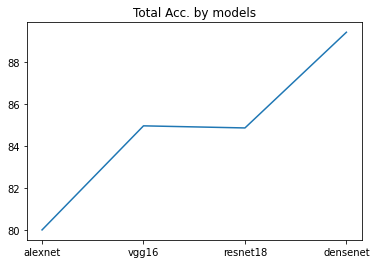

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model_names, total_acc)
plt.title("Total Acc. by models")
plt.show()

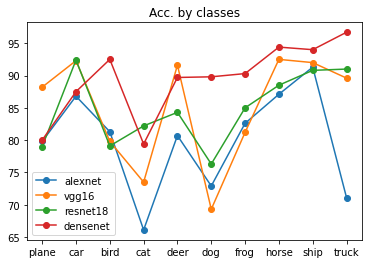

In [ ]:
import numpy as np

for correct, total, name in zip(total_class_correct, total_class_total, model_names):
    correct = np.array(correct)
    total = np.array(total)
    acc = (correct / total)*100
    plt.plot(classes, acc, label=name, marker='o')

plt.title("Acc. by classes")
plt.legend()
plt.show()